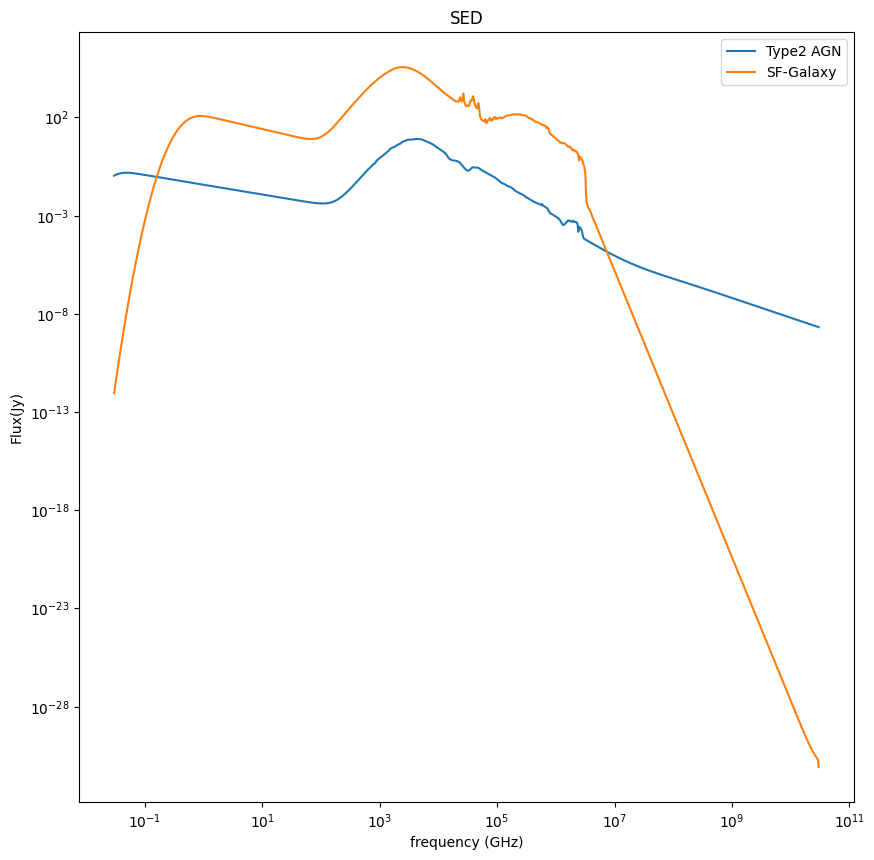

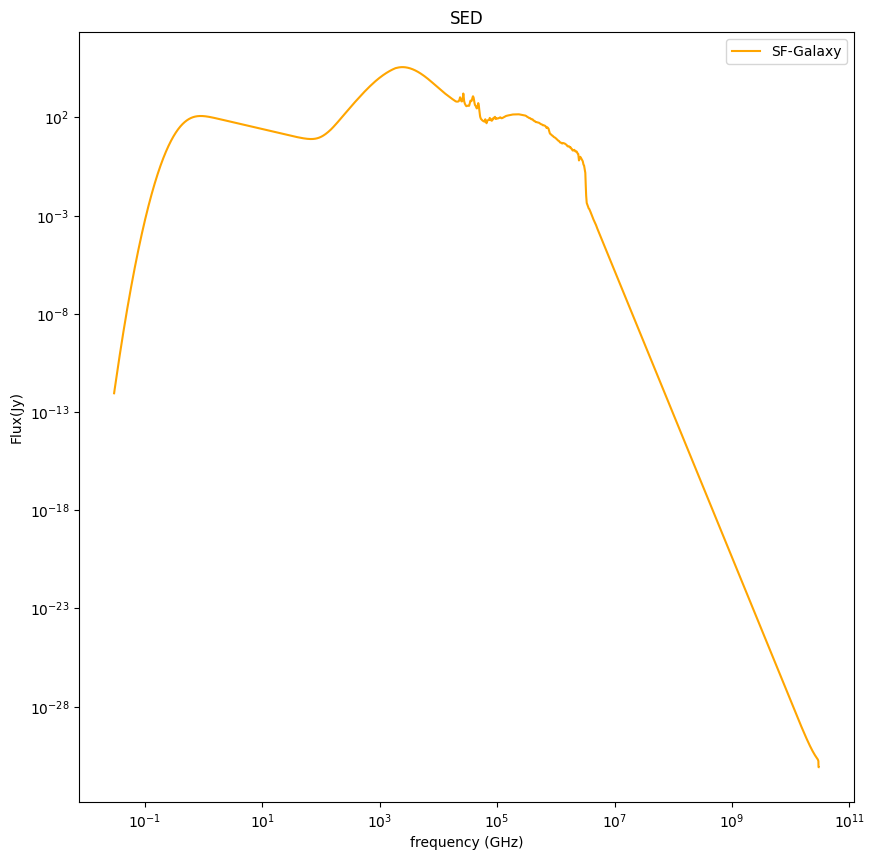

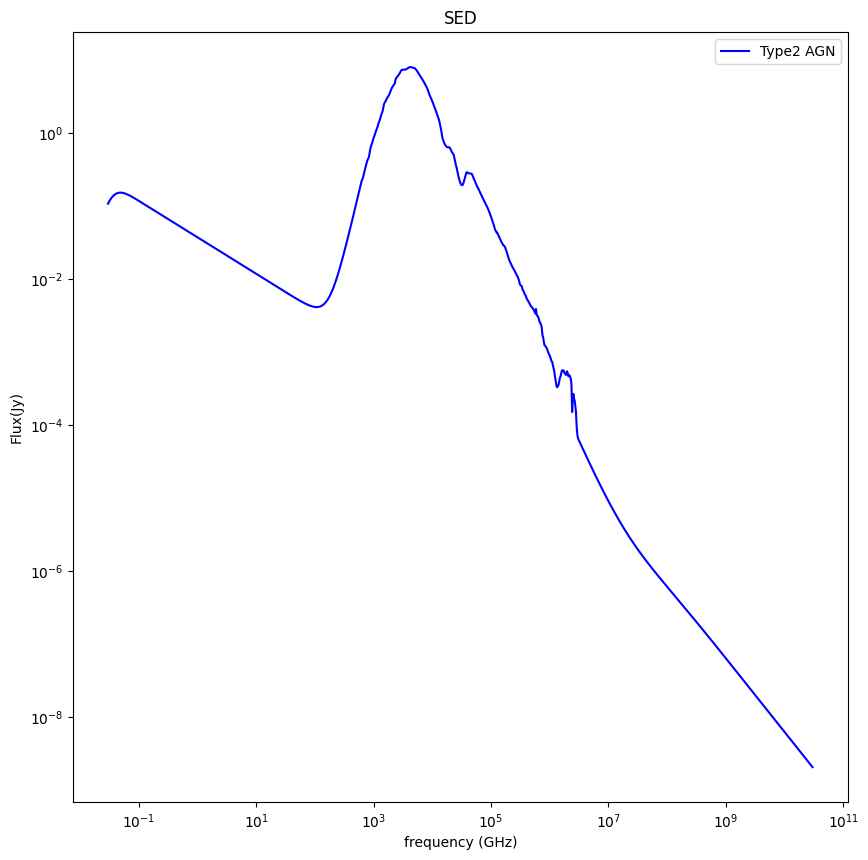

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from astropy.cosmology import FlatLambdaCDM
from astropy import units as U
from scipy.constants import c
import sys
from math import pi

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

def sed_reading(type_, path, lum_infrared=None, redshift=None):
    cosmo = FlatLambdaCDM(H0=70 * U.km / U.s / U.Mpc, Tcmb0=2.725 * U.K, Om0=0.3)
    if type_ == "extended" or type_ == 'diffuse':
        file_path = os.path.join(path, 'SED_low_z_warm_star_forming_galaxy.dat')
        if redshift is None:
            redshift = 10**(-4)
        if lum_infrared is None: 
            lum_infrared = 1e+10 # luminosity in solar luminosities
    elif type_ == "point" or type_ == "gaussian":
        file_path = os.path.join(path, 'SED_low_z_type2_AGN.dat')
        if redshift is None:
            redshift = 0.05
        if lum_infrared is None:
            lum_infrared = 1e+9 # luminosity in solar luminosities
    else:
        return "Not valid type"
    # Compute luminosity distance in Mpc
    distance_Mpc = cosmo.luminosity_distance(redshift).value # distance in Mpc
    Mpc_to_cm = 3.086e+24 # Mpc to cm
    distance_cm = distance_Mpc * Mpc_to_cm # distance in cm  -XX
    solid_angle = 4 * pi  * distance_cm**2 # solid angle in cm^2 -XX
    so_to_erg_s = 3.846e+33 # Solar luminosity to erg/s -XX
    lum_infrared_erg_s = lum_infrared * so_to_erg_s # luminosity in erg/s -XX
    
    # Load the SED
    sed = pd.read_csv(file_path, sep=r"\s+")
    # Convert to GHz
    sed['GHz'] = sed['um'].apply(lambda x: (x* U.um).to(U.GHz, equivalencies=U.spectral()).value)
    # Re normalize the SED and convert to Jy from erg/s/Hz
    sed['Jy'] = lum_infrared_erg_s * sed['erg/s/Hz'] * 1e+23 / solid_angle
    #  Flux (Jy) =L (erg/s/Hz) * 10^23 /  * 4 pi d^2(cm)
    flux_infrared = lum_infrared_erg_s * 1e+23 / solid_angle # Jy * Hz 
    #flux_infrared_jy = flux_infrared  / (sed['GHz'].values * U.GHz).to(U.Hz).value  # Jy
    #sed.drop(columns=['um', 'erg/s/Hz'], inplace=True)
    sed = sed.sort_values(by='GHz', ascending=True) 
    return sed, flux_infrared

sed_point, flux_infrared_point = sed_reading("point", os.path.join(parent_dir, 'brightnes'), lum_infrared=1e+12, redshift=0.05)
sed_extended, flux_infrared_ext = sed_reading("extended", os.path.join(parent_dir, 'brightnes'), lum_infrared=1e+12, redshift=0.05)

plt.figure(figsize=(10,10))
plt.plot(sed_point['GHz'], sed_point['Jy'], label='Type2 AGN')
plt.plot(sed_extended['GHz'], sed_extended['Jy'], label='SF-Galaxy')
plt.xlabel('frequency (GHz)')
plt.ylabel('Flux(Jy)')
plt.title('SED')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()
plt.figure(figsize=(10,10))
plt.plot(sed_extended['GHz'], sed_extended['Jy'], label='SF-Galaxy', color = 'orange')
plt.xlabel('frequency (GHz)')
plt.ylabel('Flux(Jy)')
plt.title('SED')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()
plt.figure(figsize=(10,10))
plt.plot(sed_point['GHz'], sed_point['Jy'], label='Type2 AGN', color = 'blue')
plt.xlabel('frequency (GHz)')
plt.ylabel('Flux(Jy)')
plt.title('SED')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
C:\Users\lsann\AppData\Local\Temp\ipykernel_9512\1226573685.py:6: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$($\mu$n)')


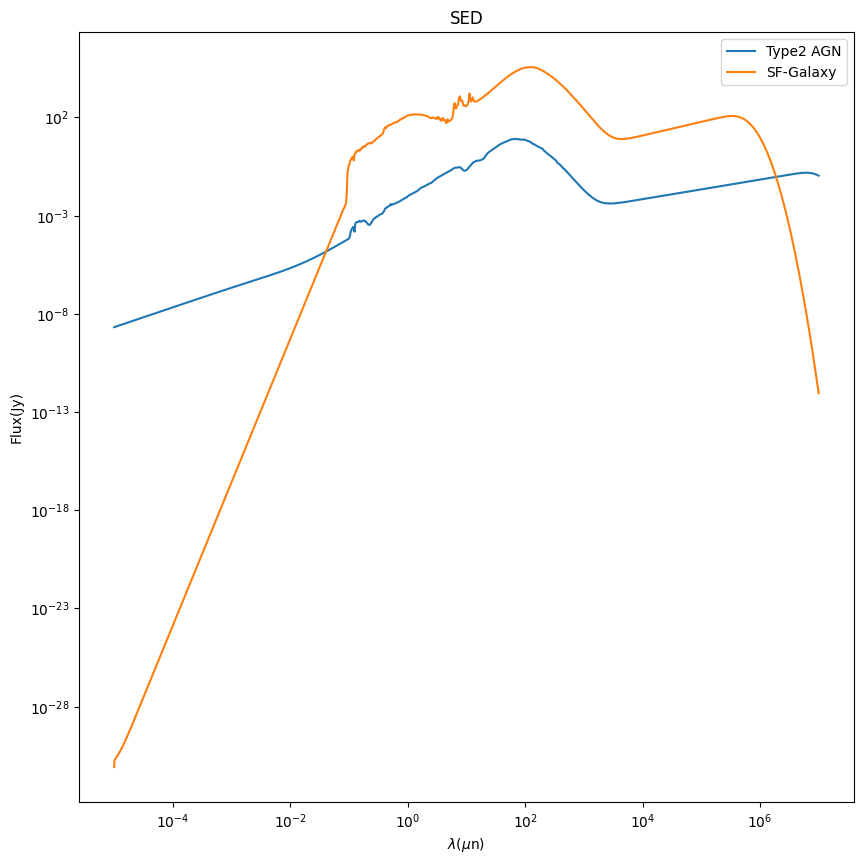

In [28]:
sed_point, flux_infrared_point = sed_reading("point", os.path.join(parent_dir, 'brightnes'), lum_infrared=1e+12, redshift=0.05)
sed_extended, flux_infrared_ext = sed_reading("extended", os.path.join(parent_dir, 'brightnes'), lum_infrared=1e+10, redshift=1e-4)
plt.figure(figsize=(10,10))
plt.plot(sed_point['um'], sed_point['Jy'], label='Type2 AGN')
plt.plot(sed_extended['um'], sed_extended['Jy'], label='SF-Galaxy')
plt.xlabel('$\lambda$($\mu$n)')
plt.ylabel('Flux(Jy)')
plt.title('SED')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()